## Data Modeling and Analysis (Investing, Stocks)

#### Modeling the data and gathering insights.The following steps has been followed:
- Data Exploration
- Data Visualization
- Conclusions

##### Notes to self

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

#wordcloud
from wordcloud import WordCloud

#nltk
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading data
df = pd.read_csv('../Analysis/data/processed_data.csv')
df.head()

,id,subreddit,title,selftext,time_now,time_difference,num_comments,upvote_ratio,url,hour_of_day,day_of_week
0,18888ww,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,Please use this thread to discuss your portfol...,2024-02-28 22:08:57.699800,89 days 12:08:33.699801,1.003735,1.310581,https://www.reddit.com/r/stocks/comments/18888...,10,4
1,1b22xgu,stocks,"r/Stocks Daily Discussion Wednesday - Feb 28, ...",These daily discussions run from Monday to Fri...,2024-02-28 22:08:57.699812,0 days 11:38:48.699813,0.453359,1.055929,https://www.reddit.com/r/stocks/comments/1b22x...,10,2
2,1b2dv7t,stocks,Google hit with $2.3 bln lawsuit by Axel Sprin...,https://www.reuters.com/technology/google-hit-...,2024-02-28 22:08:57.699817,0 days 03:21:32.699817,-0.315758,1.217981,https://www.reddit.com/r/stocks/comments/1b2dv...,18,2
3,1b2hsi4,stocks,Snowflake says Frank Slootman is retiring as C...,Snowflake said Wednesday that CEO Frank Slootm...,2024-02-28 22:08:57.699821,0 days 00:49:11.699822,-0.400431,1.241131,https://www.reddit.com/r/stocks/comments/1b2hs...,21,2
4,1b27suh,stocks,Stripe all but delays IPO. Valuation rises to ...,\n\nFeb 28 (Reuters) - Stripe's valuation surg...,2024-02-28 22:08:57.699826,0 days 07:19:22.699826,-0.327518,1.264281,https://www.reddit.com/r/stocks/comments/1b27s...,14,2


In [3]:
df.shape

(3802, 11)

In [4]:
in_sa_df = df[df['subreddit'].isin(['investing', 'stocks'])]

in_sa_df.head()

,id,subreddit,title,selftext,time_now,time_difference,num_comments,upvote_ratio,url,hour_of_day,day_of_week
0,18888ww,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,Please use this thread to discuss your portfol...,2024-02-28 22:08:57.699800,89 days 12:08:33.699801,1.003735,1.310581,https://www.reddit.com/r/stocks/comments/18888...,10,4
1,1b22xgu,stocks,"r/Stocks Daily Discussion Wednesday - Feb 28, ...",These daily discussions run from Monday to Fri...,2024-02-28 22:08:57.699812,0 days 11:38:48.699813,0.453359,1.055929,https://www.reddit.com/r/stocks/comments/1b22x...,10,2
2,1b2dv7t,stocks,Google hit with $2.3 bln lawsuit by Axel Sprin...,https://www.reuters.com/technology/google-hit-...,2024-02-28 22:08:57.699817,0 days 03:21:32.699817,-0.315758,1.217981,https://www.reddit.com/r/stocks/comments/1b2dv...,18,2
3,1b2hsi4,stocks,Snowflake says Frank Slootman is retiring as C...,Snowflake said Wednesday that CEO Frank Slootm...,2024-02-28 22:08:57.699821,0 days 00:49:11.699822,-0.400431,1.241131,https://www.reddit.com/r/stocks/comments/1b2hs...,21,2
4,1b27suh,stocks,Stripe all but delays IPO. Valuation rises to ...,\n\nFeb 28 (Reuters) - Stripe's valuation surg...,2024-02-28 22:08:57.699826,0 days 07:19:22.699826,-0.327518,1.264281,https://www.reddit.com/r/stocks/comments/1b27s...,14,2


In [5]:
in_sa_df.shape

(3802, 11)

In [6]:
#Downloading NLTK data
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajashreechoudhary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajashreechoudhary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
'''This function will clean and normalize the text data to make 
it suitable for further analysis and modeling in NLP tasks. '''

def preprocess_text(text):
 
    # Lowercasing the text
    text = text.lower()
    # Removing special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

In [8]:
'''  
The code involves preparing the data through preprocessing steps and dividing it into
training and testing sets. Additionally, it creates a vectorizer object to transform
the text data into numerical representations appropriate for NLP tasks.
'''
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [9]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(in_sa_df)

In [10]:
X_train

<3041x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 228773 stored elements in Compressed Sparse Row format>

#### Term Frequency-Inverse Document Frequency.

In [11]:
pd.DataFrame(X_train.toarray(), columns = vectorizer.get_feature_names_out())

,__source,_of_,aa,aapl,aautomoderator,ab,abc,ability,able,absolute,...,ytd,yuan,zacks,zalando,zee,zero,zillow,zone,zoom,zuckerberg
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3037,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3038,0.0,0.0,0.007216,0.000000,0.0,0.0,0.0,0.0,0.0,0.007216,...,0.007152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Reviewing the word cloud

In [12]:
#saving it
td_idf_df = pd.DataFrame(X_train.toarray(), columns = vectorizer.get_feature_names_out())

In [13]:
#### Now sum the score of each td_idf word and generate the wordcloud

In [14]:
#sum the tdidf score
word_frequencies = td_idf_df.sum(axis = 0).to_dict()

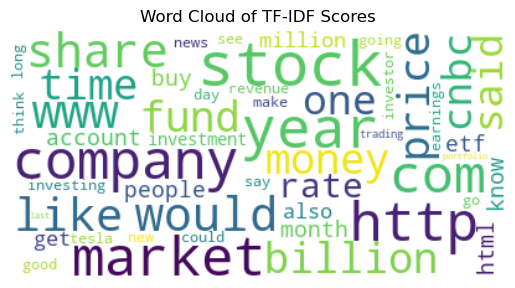

In [112]:
#Generate word_cloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50,
                      random_state=42).generate_from_frequencies(word_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis("off")
plt.savefig('../Images/Word_cloud_tf_idf_scores.png', dpi=200, bbox_inches='tight')
plt.show()

# Logistic Regression Model

In [16]:
#initialize the Logistic Regression Model
logreg = LogisticRegression()

In [17]:
#fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

   investing       0.70      0.73      0.72       387
      stocks       0.71      0.68      0.70       374

    accuracy                           0.71       761
   macro avg       0.71      0.71      0.71       761
weighted avg       0.71      0.71      0.71       761



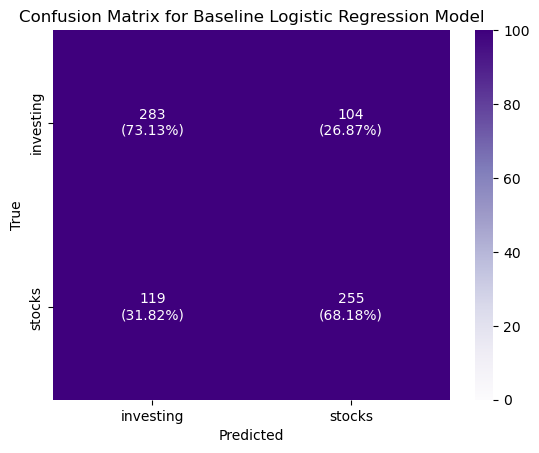

In [113]:
# Make predictions on the test set
y_pred_lr = logreg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


#Export classification report to CSV
report = classification_report(y_test, y_pred_lr, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report)
# Save the DataFrame to a CSV file
report_df.to_csv('../Conclusion/reports/classification_report_base_lr.csv')



# Confusion matrix calculation
cm_lrg = confusion_matrix(y_test, y_pred_lr)

# Convert confusion matrix to percentages
cm_lr_percent = cm_lrg / cm_lrg.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm_lr = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_lrg, cm_lr_percent)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


# Plot confusion matrix
sns.heatmap(cm_lrg,
            annot=combined_cm_lr,
            fmt='',
            cmap='Purples',
            xticklabels=['investing', 'stocks'],
            yticklabels=['investing', 'stocks'],
            vmin=0,
            vmax=100,)
plt.title('Confusion Matrix for Baseline Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/cm_baseline_logreg.png', dpi=200, bbox_inches='tight')
plt.show()

In [19]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2', 'elasticnet', None],
    'max_iter': [100, 200, 300],
    'random_state': [42],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)

C                  1
max_iter         100
multi_class     auto
n_jobs            -1
penalty           l2
random_state      42
dtype: object

              precision    recall  f1-score   support

   investing       0.70      0.73      0.72       387
      stocks       0.71      0.68      0.70       374

    accuracy                           0.71       761
   macro avg       0.71      0.71      0.71       761
weighted avg       0.71      0.71      0.71       761



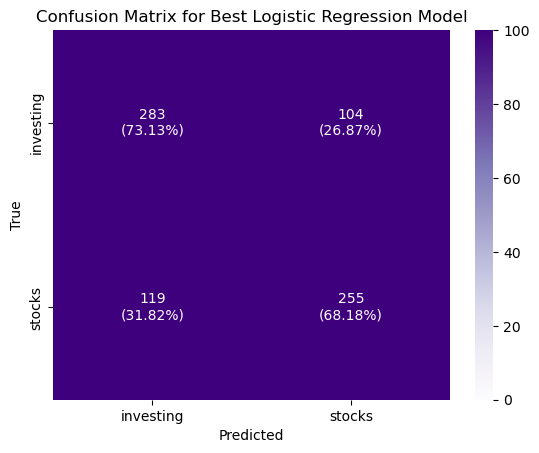

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit Grid Search with your training data
grid_search.fit(X_train, y_train)

# Print best parameters
print(pd.Series(grid_search.best_params_))
print()

# Make predictions on the test set using the best model
y_pred_best_lr = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_best_lr))

# Export classification report to CSV
report = classification_report(y_test, y_pred_best_lr, output_dict=True)
report_df = pd.DataFrame(report)
report_df.to_csv('../Conclusion/reports/classification_report_best_lr.csv')

# Confusion matrix calculation
cm_lrg_best = confusion_matrix(y_test, y_pred_best_lr)

# Convert confusion matrix to percentages
cm_lr_best_percent = cm_lrg_best / cm_lrg_best.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm_lr_best = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_lrg_best, cm_lr_best_percent)])

# Plot confusion matrix
sns.heatmap(cm_lrg_best,
            annot=combined_cm_lr_best,
            fmt='', 
            cmap='Purples',
            xticklabels=['investing', 'stocks'],
            yticklabels=['investing', 'stocks'],
            vmin=0,
            vmax=100)
plt.title('Confusion Matrix for Best Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/cm_best_logreg.png', dpi=200, bbox_inches='tight')
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline


In [22]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = logreg.coef_[0] 
for _, class_label in enumerate(logreg.classes_): 
    sorted_indices = np.argsort(coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()
    

Class: investing
Top Positive Influential Words: ['stupid', 'increase', 'microsoft', 'saying', 'reddit', 'watching', 'new', 'trading', 'ticker', 'still', 'crash', 'streaming', 'position', 'revenue', 'fed', 'see', 'award', 'red', 'said', 'stock']
Top Negative Influential Words: ['investment', 'roth', 'ira', 'fund', 'www', 'http', 'tax', 'html', 'com', 'invest', 'bitcoin', 'cnbc', 'account', 'vanguard', 'equity', 'bond', 'looking', 'coronavirus', 'investor', 'tariff']

Class: stocks
Top Positive Influential Words: ['stupid', 'increase', 'microsoft', 'saying', 'reddit', 'watching', 'new', 'trading', 'ticker', 'still', 'crash', 'streaming', 'position', 'revenue', 'fed', 'see', 'award', 'red', 'said', 'stock']
Top Negative Influential Words: ['investment', 'roth', 'ira', 'fund', 'www', 'http', 'tax', 'html', 'com', 'invest', 'bitcoin', 'cnbc', 'account', 'vanguard', 'equity', 'bond', 'looking', 'coronavirus', 'investor', 'tariff']



## Word Cloud for Top words infuencing the subreddits

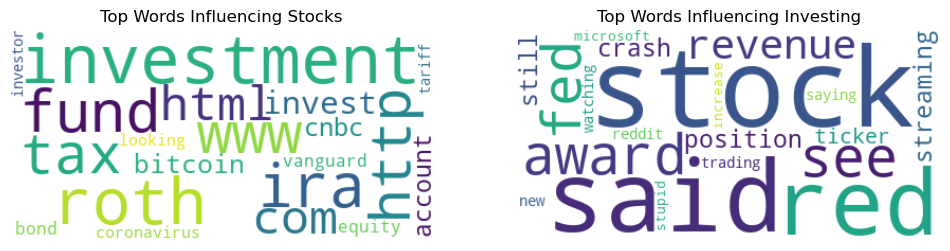

In [24]:
# For Class A (Positive Coefficients)
top_words_investing = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_stocks = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_stocks = WordCloud(background_color='white').generate_from_frequencies(top_words_stocks)

# Word Cloud for Class B
wordcloud_investing = WordCloud(background_color='white').generate_from_frequencies(top_words_investing)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_stocks, interpolation='bilinear')
plt.title('Top Words Influencing Stocks')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_investing, interpolation='bilinear')
plt.title('Top Words Influencing Investing')
plt.axis("off")
plt.savefig('../MarkdownImages/top_influencing_words.png')
plt.show()

# K-Nearest Neighbors (KNN) model

In [25]:
#initiate the knn model
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
#fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
#making prediction
y_pred_knn = knn.predict(X_test)

In [28]:
#printing the classification report
print(classification_report(y_test, y_pred_knn))
report = classification_report(y_test, y_pred_best_lr, output_dict=True)
report_df_knn = pd.DataFrame(report)
report_df_knn.to_csv('../Conclusion/reports/knn_classification_report_base.csv')

              precision    recall  f1-score   support

   investing       0.63      0.79      0.70       387
      stocks       0.70      0.51      0.59       374

    accuracy                           0.65       761
   macro avg       0.66      0.65      0.65       761
weighted avg       0.66      0.65      0.65       761



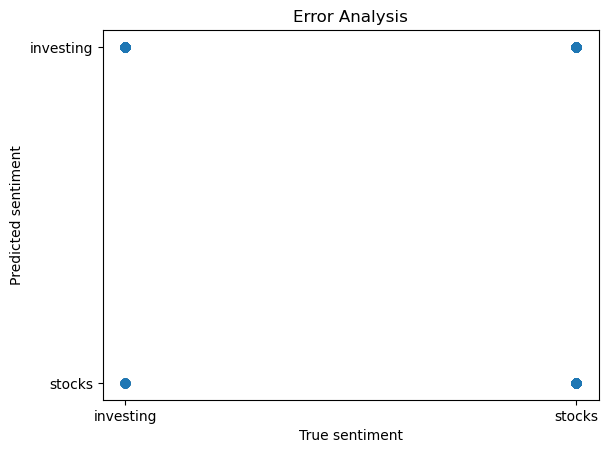

In [29]:
## doing error analysis for KNN model
plt.scatter(y_test, y_pred_knn)
plt.xlabel('True sentiment')
plt.ylabel('Predicted sentiment')
plt.title('Error Analysis')
plt.show()

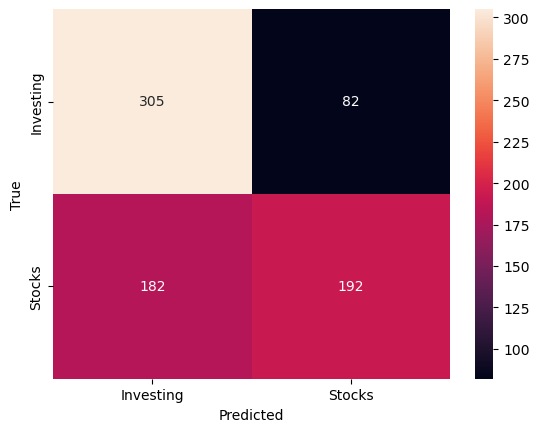

In [30]:
#confusion matrix for knn model

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Investing', 'Stocks'], yticklabels=['Investing', 'Stocks'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../MarkdownImages/knn_confusion_matric.png')
plt.show()

In [31]:
#Scale the features

#initiate StandardScaler
ss = StandardScaler(with_mean=False)

In [32]:
#The scaler is fitted on the training data (X_train) and then transforms it to obtain scaled training data.
X_train_scaled = ss.fit_transform(X_train)

In [33]:
#The fitted scaler is used to transform the test data (X_test) to ensure consistency in scaling.
X_test_scaled = ss.transform(X_test)

In [34]:
#KNN model with GridsearchCV to tune the parameters

In [35]:
# GridSearch for parameter tuning
knn_params = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_scaled = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_scaled, knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [36]:
# Best KNN model
best_knn = grid_search.best_estimator_
best_knn

LogisticRegression(C=1, n_jobs=-1, random_state=42)

In [37]:
#make prediction
y_pred_best_knn =best_knn.predict(X_train_scaled)

In [38]:
print(pd.Series(grid_search_knn.best_params_))

metric         euclidean
n_neighbors            1
weights          uniform
dtype: object


In [39]:
#classification report
print("Classification Report: \n\n",classification_report(y_test, y_pred_knn))
report = classification_report(y_test, y_pred_knn, output_dict=True)
report_df_knn_b = pd.DataFrame(report)
report_df_knn_b.to_csv('../Conclusion/reports/knn_classification_report_best.csv')

Classification Report: 

               precision    recall  f1-score   support

   investing       0.63      0.79      0.70       387
      stocks       0.70      0.51      0.59       374

    accuracy                           0.65       761
   macro avg       0.66      0.65      0.65       761
weighted avg       0.66      0.65      0.65       761



In [40]:
#Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred_knn))

Accuracy: 
 0.6530880420499343


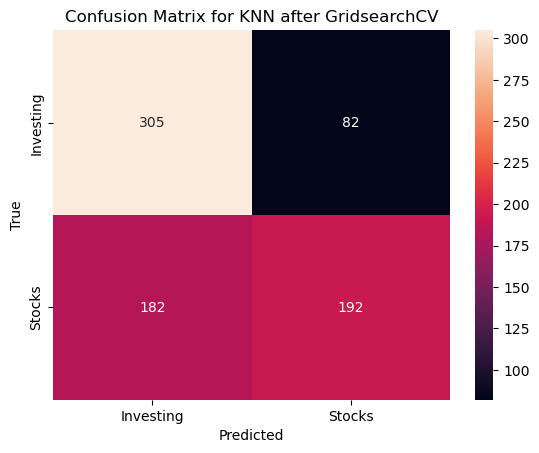

In [41]:
# Confusion matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Investing', 'Stocks'], yticklabels=['Investing', 'Stocks'])
plt.title('Confusion Matrix for KNN after GridsearchCV')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../MarkdownImages/knn_cm_after_tuning.png')
plt.show()

# Random Forest Classifier Model

In [42]:
#Initiate the rf model
rf = RandomForestClassifier()

In [43]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
#predicting
y_pred_rf = rf.predict(X_test)

In [45]:
#classification report
print(classification_report(y_test, y_pred_rf))
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report)
report_df_rf.to_csv('../Conclusion/reports/rf_classification_report_base.csv')

              precision    recall  f1-score   support

   investing       0.68      0.69      0.68       387
      stocks       0.67      0.66      0.66       374

    accuracy                           0.67       761
   macro avg       0.67      0.67      0.67       761
weighted avg       0.67      0.67      0.67       761



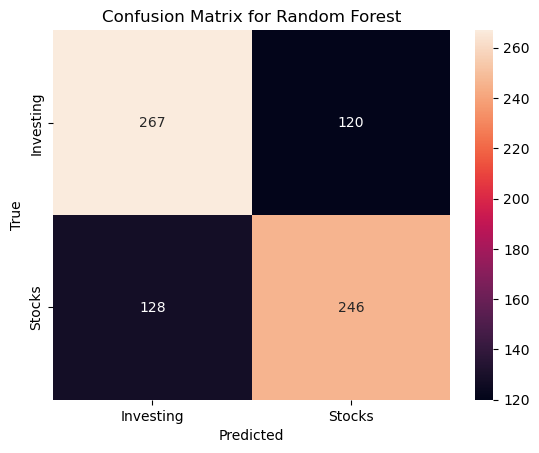

In [46]:
# Confusion matrix for Random Forest

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['Investing', 'Stocks'], yticklabels=['Investing', 'Stocks'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../MarkdownImages/rf_cm.png')
plt.show()

In [79]:
#Identify and print the top features (or words) along with their corresponding importances in a Random Forest classifier.

In [47]:
#Calculate feature importance
importances = rf.feature_importances_

#sorting and selecting top 20 features
indices = np.argsort(importances)[-20:]

#creating list for top features
top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Words and its importance:\n")
for feature, importance in top_features:
    print(f"{feature}: {importance}")


Top Words and its importance:

new: 0.0033801988254455622
source: 0.003452874214217594
bond: 0.0035299113595945912
share: 0.0037754053207475964
see: 0.0038144182861759497
invest: 0.004063468679203887
said: 0.004288734168743211
award: 0.004373670028636972
cnbc: 0.004458865868414394
company: 0.005127574071543607
account: 0.005473318199720681
html: 0.0056754190258400915
roth: 0.0059533862820360505
fund: 0.006387113283428373
investment: 0.0075161892016207595
ira: 0.007577577388662445
http: 0.00804217487708234
www: 0.008069866526765094
com: 0.00810798307965814
stock: 0.008688312787682917


In [48]:
# Create a DataFrame from the top features
df_top_features = pd.DataFrame(top_features, columns=['Feature', 'Importance'])

In [49]:
# Save DataFrame to CSV file
df_top_features.to_csv('../Conclusion/reports/top_features_random_f.csv', index=False)

In [50]:
#tuning the parameter using GridSearchCV

In [51]:
# Define parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [52]:
#initiate Gridsearch
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv=5)

#fit the model
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [54]:
# Re-evaluating with the best parameters

best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

In [55]:
# Print best parameters
print(pd.Series(grid_search_rf.best_params_))

max_depth              NaN
min_samples_leaf       2.0
min_samples_split      5.0
n_estimators         200.0
dtype: float64


In [56]:
# Print classification report
print("Classification Report: \n\n",classification_report(y_test, y_pred_best_rf))
report = classification_report(y_test, y_pred_best_rf, output_dict=True)
report_df_rf_b = pd.DataFrame(report)
report_df_rf_b.to_csv('../Conclusion/reports/rf_classification_report_best.csv')

Classification Report: 

               precision    recall  f1-score   support

   investing       0.68      0.70      0.69       387
      stocks       0.68      0.67      0.67       374

    accuracy                           0.68       761
   macro avg       0.68      0.68      0.68       761
weighted avg       0.68      0.68      0.68       761



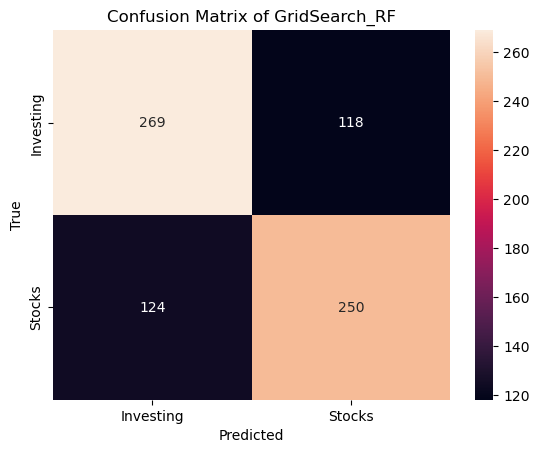

In [58]:
# Plot confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf_best,
            annot=True,
            fmt='d', 
            xticklabels=['Investing', 'Stocks'],
            yticklabels=['Investing', 'Stocks'])
plt.title('Confusion Matrix of GridSearch_RF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/rf_cm_post_tuning.png')
plt.show()

# Naive bayes Regression Model

In [60]:
#Initializing Multinomial Naive Bayes Model
mnb = MultinomialNB()

In [61]:
#fit the model
mnb.fit(X_train, y_train)

MultinomialNB()

Classification report: 

               precision    recall  f1-score   support

   investing       0.67      0.74      0.70       387
      stocks       0.70      0.63      0.66       374

    accuracy                           0.68       761
   macro avg       0.69      0.68      0.68       761
weighted avg       0.69      0.68      0.68       761



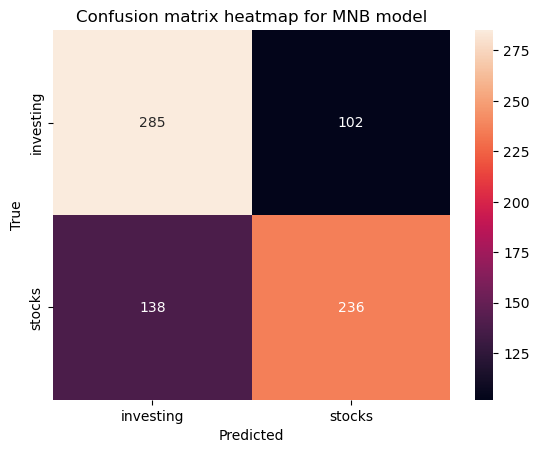

In [64]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print("Classification report: \n\n",classification_report(y_test, y_pred_mnb))
report = classification_report(y_test, y_pred_mnb, output_dict=True)
report_df_mnb = pd.DataFrame(report)
report_df_mnb.to_csv('../Conclusion/reports/mb_classification_report_base.csv')

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d', xticklabels=['investing', 'stocks'], yticklabels=['investing', 'stocks'])
plt.title('Confusion matrix heatmap for MNB model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/mnb_cm.png')
plt.show()

In [65]:
# Define a parameter grid for GridSearch
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    }

In [66]:
# Initialize and perform the grid search
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid = param_grid_mnb, cv=5)

In [67]:
#fit the model
grid_search_mnb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'class_prior': [None, [0.5, 0.5], [0.3, 0.7],
                                         [0.7, 0.3]],
                         'fit_prior': [True, False]})

In [69]:
# Re-evaluate using the best model
best_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)

Best Parameters:  {'C': 1, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42}
Classification report: 

               precision    recall  f1-score   support

   investing       0.69      0.73      0.71       387
      stocks       0.70      0.66      0.68       374

    accuracy                           0.70       761
   macro avg       0.70      0.70      0.70       761
weighted avg       0.70      0.70      0.70       761



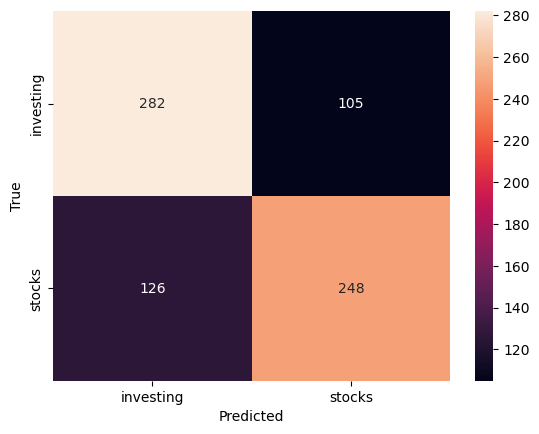

In [70]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

#Print classification report
print("Classification report: \n\n",classification_report(y_test, y_pred_best_mnb))
report = classification_report(y_test, y_pred_best_mnb, output_dict=True)
report_df_mnb_b = pd.DataFrame(report)
report_df_mnb_b.to_csv('../Conclusion/reports/mnb_classification_report_best.csv')

# Plot the confusion matrix
cm_mnb_best = confusion_matrix(y_test, y_pred_best_mnb)
sns.heatmap(cm_mnb_best,
            annot=True,
            fmt='d',
            xticklabels=['investing', 'stocks'],
            yticklabels=['investing', 'stocks'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/mnb_cm_best.png')
plt.show()

In [71]:
#identifying the top influential words for each class based on their log probabilities

log_prob = mnb.feature_log_prob_ 
for _, class_label in enumerate(mnb.classes_):
    
    #Identify Top Influential Words
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]] 

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: investing
Top Influential Words: ['investing', 'etf', 'ira', 'share', 'html', 'roth', 'investment', 'cnbc', 'account', 'money', 'like', 'company', 'would', 'fund', 'market', 'www', 'year', 'stock', 'com', 'http']

Class: stocks
Top Influential Words: ['one', 'million', 'people', 'earnings', 'revenue', 'tesla', 'time', 'www', 'would', 'like', 'said', 'price', 'billion', 'com', 'http', 'share', 'market', 'year', 'company', 'stock']



# Gradient Boosting Model

In [74]:
#initiate the model
gb = GradientBoostingClassifier(n_estimators=500, random_state=142)

In [75]:
#fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=142)

In [76]:
#prediction
y_pred_gb = gb.predict(X_test)

In [77]:
# Print classification report
print("Classification report: \n\n",classification_report(y_test, y_pred_gb))

Classification report: 

               precision    recall  f1-score   support

   investing       0.67      0.69      0.68       387
      stocks       0.67      0.65      0.66       374

    accuracy                           0.67       761
   macro avg       0.67      0.67      0.67       761
weighted avg       0.67      0.67      0.67       761



In [78]:
#Export classification report to CSV
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report)

# Save the DataFrame to a CSV file
report_df.to_csv('../Conclusion/reports/classification_report_base_gb.csv')

In [79]:
# Confusion matrix calculation
cm_gb = confusion_matrix(y_test, y_pred_gb)

In [80]:
# Convert confusion matrix to percentages
cm_gb_percent = cm_gb / cm_gb.sum(axis=1).reshape(-1,1) * 100

In [81]:
# Create combined matrix with counts and percentages
combined_cm = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_gb, cm_gb_percent)])

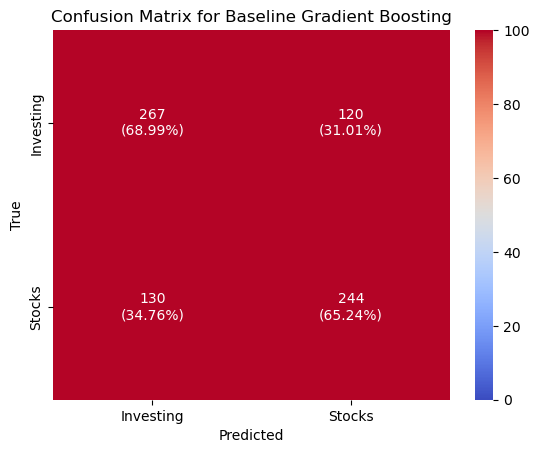

In [87]:
# Confusion matrix for Gradient Boosting

sns.heatmap(cm_gb, annot=combined_cm, fmt='', cmap='coolwarm', xticklabels=['Investing', 'Stocks'], yticklabels=['Investing', 'Stocks'], vmin=0, vmax=100,)
plt.title('Confusion Matrix for Baseline Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/gb_cm.png')
plt.show() 

In [88]:
# Variables

importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[-20:]  

top_features_gb = [(feature_names[i], importances_gb[i]) for i in indices_gb]
print("Top Features and Words for Gradient Boosting:")
for feature, importance in top_features_gb:
    print(f"{feature}: {importance}")
    
df_top_features = pd.DataFrame(top_features, columns=['Feature', 'Importance'])
df_top_features.to_csv('../Conclusion/reports/gradient_boosting_top_features.csv', index=False)

Top Features and Words for Gradient Boosting:
bond: 0.007917359487161942
new: 0.008261339811329305
coronavirus: 0.00833571971409251
ticker: 0.00837696735503386
red: 0.008860874264073651
invest: 0.00888651642881515
ira: 0.010906760793080368
http: 0.010969590839489044
reported: 0.011673460198199426
com: 0.012817976570092548
account: 0.01313990516725898
cnbc: 0.014377681260150505
award: 0.014428619348292003
www: 0.017155564277739867
source: 0.02219416815067351
company: 0.02265745135168914
investment: 0.023463318430713746
fund: 0.025782678708611895
roth: 0.026188942752747853
stock: 0.033428772350224074


In [89]:
#tuning the parameters

In [95]:
# Define parameter grid for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

In [96]:
# Initialize Grid Search
gb = GradientBoostingClassifier(random_state=142)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=8)

In [ ]:
# params = {
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [None, 1, 2, 3]
# }

# gb = GradientBoostingClassifier(random_state=2025)
# gs = GridSearchCV(gb, params, cv=5, n_jobs=8)

In [99]:
%%time
#fit the model
grid_search_gb.fit(X_train, y_train)

CPU times: user 4.94 s, sys: 609 ms, total: 5.55 s
Wall time: 16min 11s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=142),
             n_jobs=8,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]})

In [100]:
# Re-evaluate with the best parameters
best_model_gb = grid_search_gb.best_estimator_

#predict the best model
y_pred_best_gb = best_model_gb.predict(X_test)

In [101]:
# Print best parameters
print("Best Parameters for Gradient Boosting:")
print(pd.Series(grid_search_gb.best_params_))

Best Parameters for Gradient Boosting:
learning_rate          0.1
max_depth              3.0
min_samples_leaf       2.0
min_samples_split      2.0
n_estimators         100.0
dtype: float64


In [102]:
# Print classification report for the best model
print("Classification Report for Best Gradient Boosting Model: \n", classification_report(y_test, y_pred_best_gb))

Classification Report for Best Gradient Boosting Model: 
               precision    recall  f1-score   support

   investing       0.67      0.69      0.68       387
      stocks       0.67      0.65      0.66       374

    accuracy                           0.67       761
   macro avg       0.67      0.67      0.67       761
weighted avg       0.67      0.67      0.67       761



In [104]:
#Export classification report to CSV
report = classification_report(y_test, y_pred_best_gb, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report)

# Save the DataFrame to a CSV file
report_df.to_csv('../Conclusion/reports/gb_best_classification_report.csv')

In [105]:
# Confusion matrix calculation
cm_gb = confusion_matrix(y_test, y_pred_best_gb)

# Convert confusion matrix to percentages
cm_gb_percent = cm_gb / cm_gb.sum(axis=1).reshape(-1,1) * 100

In [106]:
# Create combined matrix with counts and percentages

#REF: https://medium.com/@dtuk8
combined_cm = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_gb, cm_gb_percent)])

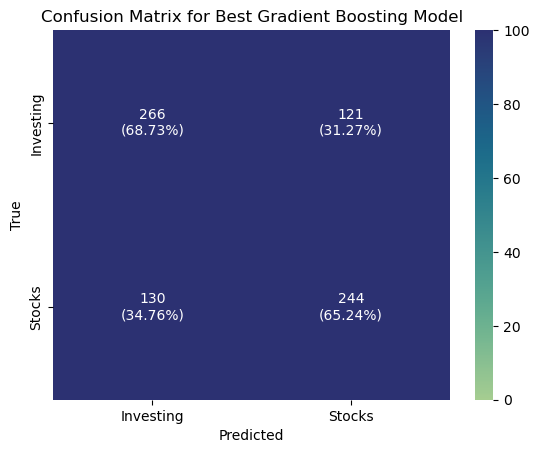

In [107]:
# Plotting
sns.heatmap(cm_gb, annot=combined_cm, fmt='', cmap='crest', xticklabels=['Investing', 'Stocks'], yticklabels=['Investing', 'Stocks'], vmin=0, vmax=100,)
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../Images/gb_cm_post_tuning.png')
plt.show() 

In [115]:
pd.DataFrame(grid_search_gb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.849605,0.066683,0.006120,0.003415,0.01,3,1,2,100,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.658456,0.636513,0.620066,0.616776,0.634868,0.633336,0.014791,108
1,10.155336,0.119657,0.008293,0.003827,0.01,3,1,2,200,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.665025,0.654605,0.648026,0.667763,0.648026,0.656689,0.008325,91
2,15.355928,0.199254,0.007546,0.001738,0.01,3,1,2,300,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.686371,0.657895,0.651316,0.689145,0.654605,0.667866,0.016398,42
3,5.087097,0.134888,0.004489,0.001408,0.01,3,1,4,100,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.660099,0.636513,0.621711,0.616776,0.634868,0.633993,0.015072,107
4,10.445574,0.161402,0.005393,0.001558,0.01,3,1,4,200,"{'learning_rate': 0.01, 'max_depth': 3, 'min_s...",0.661741,0.654605,0.644737,0.667763,0.648026,0.655374,0.008506,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,18.667526,0.228269,0.009868,0.002186,0.2,5,2,2,200,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.688013,0.675987,0.675987,0.661184,0.628289,0.665892,0.020636,54
104,27.874691,0.409605,0.009768,0.002745,0.2,5,2,2,300,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.674877,0.689145,0.677632,0.671053,0.625000,0.667541,0.022111,44
105,9.316261,0.168405,0.004599,0.000756,0.2,5,2,4,100,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.666667,0.680921,0.671053,0.662829,0.631579,0.662610,0.016649,76
106,18.705188,0.217916,0.007488,0.001577,0.2,5,2,4,200,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.688013,0.675987,0.675987,0.661184,0.628289,0.665892,0.020636,54


---------------

# Summary of Models

In [108]:
from datetime import datetime
# Variables
today_date = datetime.now().strftime("%Y-%m-%d")

In [110]:
# Check if the CSV file exists
if os.path.exists("../Conclusion/reports/model_performance_investing_stocks.csv"):
    # Load the existing DataFrame
    model_comparison_df = pd.read_csv("../Conclusion/reports/model_performance_investing_stocks.csv")
else:
    # Initialize a new DataFrame if the file does not exist
    model_comparison_df = pd.DataFrame()

# Capture the best scores and parameters for each model
new_data = {
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Random Forest", "KNN", "Gradient Boosting"],
    f"{today_date}_Score": [
        grid_search.best_score_,
        grid_search_mnb.best_score_,
        grid_search_rf.best_score_,
        grid_search_knn.best_score_,
        grid_search_gb.best_score_
    ],
    f"{today_date}_Params": [
        str(grid_search.best_params_),
        str(grid_search_mnb.best_params_),
        str(grid_search_rf.best_params_),
        str(grid_search_knn.best_params_),
        str(grid_search_gb.best_params_)
    ]
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Update the existing DataFrame with the new data
model_comparison_df = pd.concat([model_comparison_df, new_data_df], axis=0)

# Sort the DataFrame by the highest best score for the current run
model_comparison_df = model_comparison_df.sort_values(by=f"{today_date}_Score", ascending=False)

# Save the DataFrame to a CSV file
model_comparison_df.to_csv("../Conclusion/reports/model_performance_investing_stocks.csv", index=False)

# Display the DataFrame
model_comparison_df

,Model,2024-03-02_Score,2024-03-02_Params
0,Logistic Regression,0.692201,"{'C': 1, 'max_iter': 100, 'multi_class': 'auto..."
2,Random Forest,0.687600,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
4,Gradient Boosting,0.677733,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa..."
1,Multinomial Naive Bayes,0.675761,"{'alpha': 10, 'class_prior': None, 'fit_prior'..."
3,KNN,0.541597,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."


In [111]:
# Gather the influencing words for each class
top_words_investing = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}
top_words_stocks = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}
top_words_mnb_investing = {feature_names[i]: abs(class_log_probabilities[i]) for i in sorted_indices[:20]}
top_words_mnb_stocks = {feature_names[i]: abs(class_log_probabilities[i]) for i in sorted_indices[-20:]}
top_words_rf_investing = {feature_names[i]: abs(importances[i]) for i in indices[:20]}
top_words_rf_stocks = {feature_names[i]: abs(importances[i]) for i in indices[-20:]}
top_words_gb_investing = {feature_names[i]: abs(importances_gb[i]) for i in indices_gb[:20]}
top_words_gb_stocks = {feature_names[i]: abs(importances_gb[i]) for i in indices_gb[-20:]}

# Create a list of all unique words from all dictionaries
unique_words = list(set(top_words_investing.keys()).union(top_words_stocks.keys(),
                   top_words_mnb_investing.keys(), top_words_mnb_stocks.keys(),
                   top_words_rf_investing.keys(), top_words_rf_stocks.keys(),
                   top_words_gb_investing.keys(), top_words_gb_stocks.keys()))

# Initialize a DataFrame with these unique words as the index
top_words_df = pd.DataFrame(index=unique_words)

# Populate the DataFrame with the values from the dictionaries
for model, class_dict in [('Logistic Regression', (top_words_investing, top_words_stocks)), 
                          ('Multinomial Naive Bayes', (top_words_mnb_investing, top_words_mnb_stocks)),
                          ('Random Forest', (top_words_rf_investing, top_words_rf_stocks)),
                          ('Gradient Boosting', (top_words_gb_investing, top_words_gb_stocks))]:
    for class_label, words_dict in [('Investing', class_dict[0]), ('Stocks', class_dict[1])]:
        column_name = f'{model}_{class_label}'
        top_words_df[column_name] = top_words_df.index.map(words_dict).fillna(0)

# Display the DataFrame
top_words_df

top_words_df.to_csv('../Conclusion/reports/top_words.csv', index=True)
 